<a href="https://colab.research.google.com/github/yec3168/DAP__/blob/main/happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **World Happiness 데이터 분석**

                                                                          201812033 연응찬 
이번에 제가 조사할 데이터는 World Happiness로 전 세계의 행복도를 분석하는 것입니다.

2015년부터 2019년의 데이터를 바탕으로 하고 있으며
1인당 GDP, 가족, 건강(기대 수명), 자유, 관대함, 신뢰 정부 부패와 같은 요소들이 각 국가의 행복을 평가하는 데 기여하는 정도를 설명 하고 있고, 앞서 말한 요소들에 의해 각 국가의 행복지수를 평가해 점수를 매깁니다.

주된 목표로는 각 요소들이 행복 지수에 얼마나 기여하고 있는지 분석하고 그것을 시각화 하는 것을 목표로 하고 진행 하겠습니다.



## **Kaggle에서 Datasheet 불러오기**



▶**Kaggle** 데이터 시트를 구글 **Colab**에 불러와 사용할수 있도록 하기 위해서는  필수적인 작업이 있다.

 아래 작업이 kaggle에 데이터시트를 가져와서 사용하는 방법이다. 

 먼저, Kaggle에 들어가 로그인을 하고, 메뉴에서 Account에 들어가 Create New API Token을 눌러 Kaggle.json파일을 다운받는다.
 
 그리고 Colab에 아래코드를 복사해 붙여놓고 파일선택으로 아까 다운받은 Kaggle.json파일을 선택한다.

In [ ]:
#@title 기본 제목 텍스트
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeonec","key":"c3d16950a73eda7d5d808e6cf6495598"}'}

아래 코드는 아까 넣은 파일이 제대로 업로드 되었는지 확인하는 것이다.

In [ ]:
ls -1ha kaggle.json

kaggle.json


아래 작업은 Kaggle API 를 사용하기 위해서 json 파일을 ~/.kaggle로 이동 시키는 작업이다.

In [ ]:
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

내가 사용할 데이터시트를 사용하기 위한 작업이다.

In [ ]:
!kaggle datasets download -d unsdsn/world-happiness

!ls

401 - Unauthorized
kaggle.json  sample_data


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


압축을 풀면 아래 사진과 같은 파일이 생성된다.

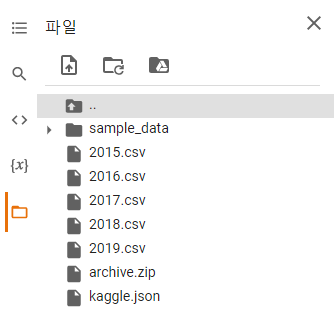

# 데이터 읽기




이번에 분석할 데이터는 전 세계의 행복도 조사이다. 앞에서 말했듯이 2015년부터 2019년까지의 데이터가 있다.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
data_2015= pd.read_csv('./2015.csv')
data_2016= pd.read_csv('./2016.csv')
data_2017= pd.read_csv('./2017.csv')
data_2018= pd.read_csv('./2018.csv')
data_2019= pd.read_csv('./2019.csv')
data_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


2018년 데이터에는 Perceptions of corruption 열에 Misiing data가 있는 것을 확인할 수 있다.

In [ ]:
print("====================2015년======================")
print(data_2015.isnull().sum())
print("====================2016년======================")
print(data_2016.isnull().sum())
print("====================2017년======================")
print(data_2017.isnull().sum())
print("====================2018년======================")
print(data_2018.isnull().sum())
print("====================2019년======================")
print(data_2019.isnull().sum())

====================2015년======================
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
====================2016년======================
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
===

전 작업에서 발견한 2018년 데이터에 NAN값을 '가장 빈번하게'나온 값으로 채워넣은 작업이다. 

빠르고 간단하지만, 정확하지가 않다.

In [ ]:
from sklearn.impute import SimpleImputer

ndata_2018 = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
ndata_2018.fit(data_2018)

ndata_2018 = pd.DataFrame(ndata_2018.transform(data_2018), columns= data_2018.columns)
ndata_2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

2015년부터 2019년까지 각 column들의 명칭이 다르기 때문에 통일을 해준다.

In [ ]:
data_2015.drop(["Region","Standard Error", "Dystopia Residual"], axis = 1, inplace=True)

data_2015 = data_2015.rename(columns={'Economy (GDP per Capita)': "GDP per Capita",
                                      'Health (Life Expectancy)': 'Health',
                                      'Trust (Government Corruption)':'Trust'})

data_2015.head(4)

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Health,Freedom,Trust,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699


In [ ]:
data_2016.drop(["Region","Lower Confidence Interval", "Upper Confidence Interval","Dystopia Residual"], axis = 1, inplace=True)

data_2016 = data_2016.rename(columns={"Economy (GDP per Capita)": "GDP per Capita",
                                      "Health (Life Expectancy)": "Health",
                                      "Trust (Government Corruption)":"Trust"})

data_2016.head(4)

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Health,Freedom,Trust,Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895


In [ ]:
data_2017.drop(["Whisker.low","Whisker.high", "Dystopia.Residual"], axis = 1, inplace=True)

data_2017 = data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                                      "Happiness.Score": "Happiness Score",
                                      'Health (Life Expectancy)': 'Health',
                                      'Economy..GDP.per.Capita.':'GDP per Capita',
                                      "Health..Life.Expectancy.": "Health",
                                      "Trust..Government.Corruption.": "Trust"})


data_2017.head(4)

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Health,Freedom,Generosity,Trust
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007


In [ ]:
ndata_2018 = ndata_2018.rename(columns={"Country or region" : "Country",
                                      "Overall rank": "Happiness Rank",
                                      "Score": "Happiness Score", 
                                      "GDP per capita": "GDP per Capita",
                                      "Social support": "Family",
                                      "Healthy life expectancy": "Health",
                                      "Freedom to make life choices": "Freedom",
                                      "Perceptions of corruption": "Trust"})

ndata_2018.head(4)

,Happiness Rank,Country,Happiness Score,GDP per Capita,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.34
2,3,Denmark,7.555,1.351,1.59,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138


In [ ]:
data_2019 = data_2019.rename(columns={"Country or region" : "Country",
                                      "Overall rank": "Happiness Rank",
                                      "Score": "Happiness Score", 
                                      "GDP per capita": "GDP per Capita",
                                      "Social support": "Family",
                                      "Healthy life expectancy": "Health",
                                      "Freedom to make life choices": "Freedom",
                                      "Perceptions of corruption": "Trust"})

data_2019.head(4)

,Happiness Rank,Country,Happiness Score,GDP per Capita,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


# 2019년

우리는 이번에 비교적 최신에 데이터를 가지고 분석해보려고 한다. 가지고 있는 데이터중 가장 최신 데이터는 2019년 데이터로, 이 데이터를 기반으로 분석할 것이다.

시작하기에 앞서, 각 column들을 설명해 보자면


*   Happiness Rank : 행복 순위는 전 세계에서 해당 국가의 순위를 나타내는 정수 값
*   Country : 국가 또는 지역의 이름
*   Happiness Score : 해당국가의 행복도 점수 
*   GDP per Capita : GDP가 행복지수 계산에 기여하는 정도.
*   Family : 가족이 행복지수 계산에 기여하는 정도
*   Health : 기대수명이 행복지수 계산에 기여한 정도
*   Freedom : 자유가 행복 점수 계산에 기여한 정도
*   Generosity : 관대함이 행복 점수 계산에 기여한 정도
*   Trust : 부패에 대한 인식이 행복지수에 기여하는 정도.








아래 각 columns사이의 상관 분석 결과를 확인해 보면 Happiness Score와 가장 상관관계가 높은 것은 GDP per Capita이다. 그 외에 Family 와 Health 또한 높은 상관 관계를 가지는것을 볼 수 있다.

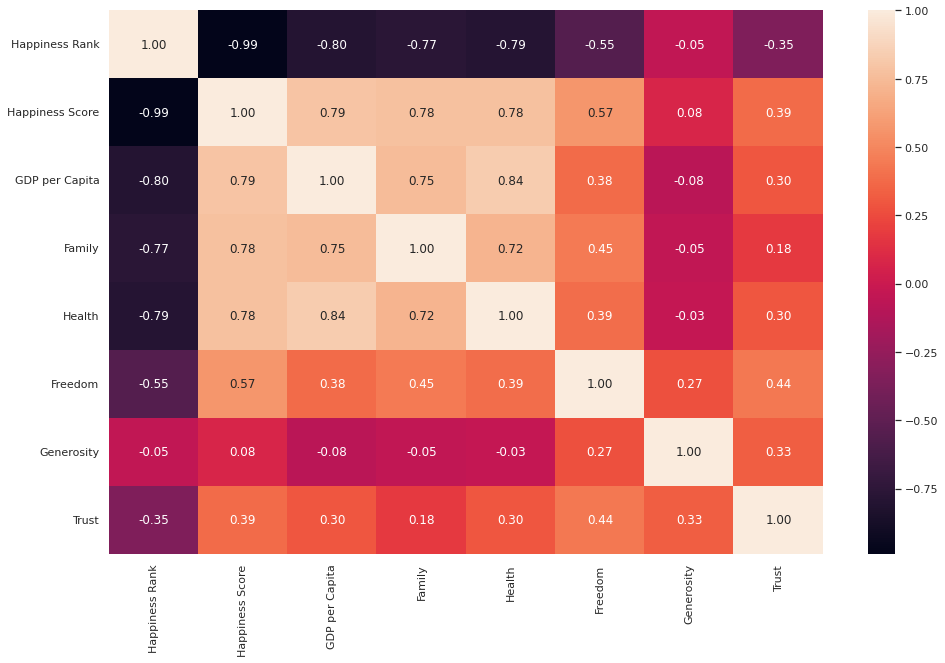

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)

plt.figure(figsize=(16, 10))

sns.heatmap(data_2019.corr(), annot= True, fmt=".2f")

plt.show()

위에 상관관계 결과를 시각화하여 보여준 것이다.

결과보면 앞서 heatmap을 통해 알다 싶이 Happiness Score와 상관관계가 높았던 GDP, Family, Health는 회귀선에 밀접한 형태를 보이는 반면 상관관계가 낮았던 Generosity는 퍼져있는 형태를 보이고 있다. 



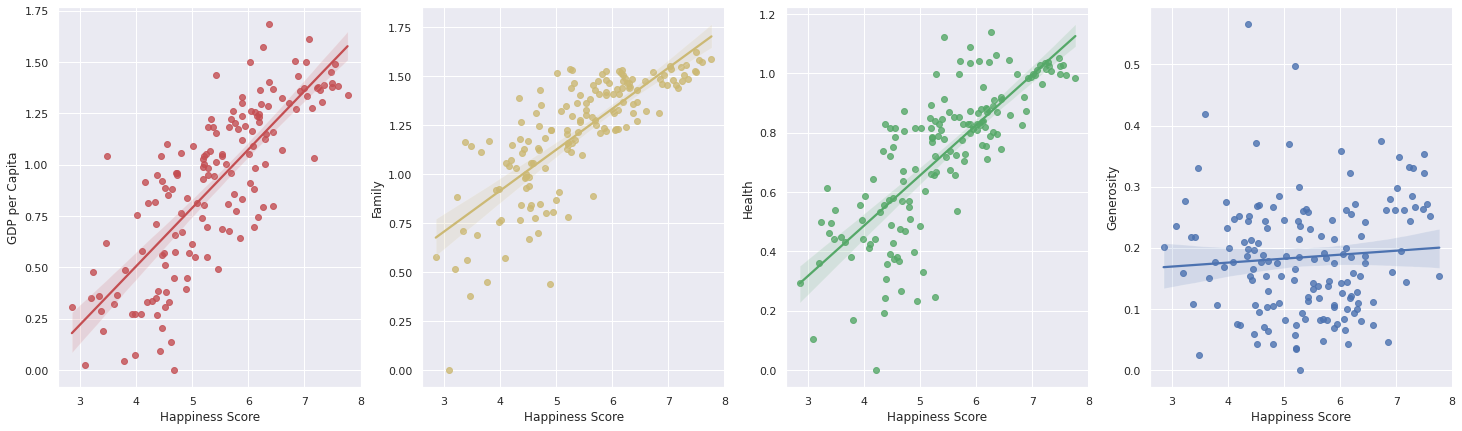

In [ ]:
fig, ax = plt.subplots(1, 4,figsize=(25,7))

g_gdp = sns.regplot(x="Happiness Score", y="GDP per Capita", data= data_2019, ax= ax[0],  color = 'r')

g_family = sns.regplot(x="Happiness Score", y="Family", data= data_2019, ax= ax[1],  color = 'y')

g_health = sns.regplot(x="Happiness Score", y="Health", data= data_2019, ax= ax[2],  color = 'g')

g_generosity = sns.regplot(x="Happiness Score", y="Generosity", data= data_2019, ax= ax[3],  color = 'b')


# 변화도

이번에는 한 국가를 선택해서 2015년부터 2019년까지 세계 행복 순위와 행복지수 등 변화를 확인해 보려고 한다.

먼저, 2019년도 세계행복지수 1위를 차지한 Finland를 분석할 것이기 때문에 빈 데이터프레임을 만들어준다. 그리고 각각 행에 2015년부터 2019년까지 데이터를 추가한다.


In [ ]:
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
ndata_2018['Year'] = 2018
data_2019['Year'] = 2019

In [ ]:
finland = pd.DataFrame(columns=["Year", "Happiness Rank", "Country", "Happiness Score", "GDP per Capita", "Family", "Health", "Freedom", "Generosity", "Trust"])
finland

,Year,Happiness Rank,Country,Happiness Score,GDP per Capita,Family,Health,Freedom,Generosity,Trust


In [ ]:
finland = finland.append([data_2015[data_2015['Country'] == 'Finland'], data_2016[data_2016['Country'] == 'Finland'],
                data_2017[data_2017['Country'] == 'Finland'], ndata_2018[ndata_2018['Country'] == 'Finland'],
                data_2019[data_2019['Country'] == 'Finland']], ignore_index=True)

finland

,Year,Happiness Rank,Country,Happiness Score,GDP per Capita,Family,Health,Freedom,Generosity,Trust
0,2015,6,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372
1,2016,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004
2,2017,5,Finland,7.469,1.44357,1.54025,0.809158,0.617951,0.245483,0.382612
3,2018,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
4,2019,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


ConversionError: ignored

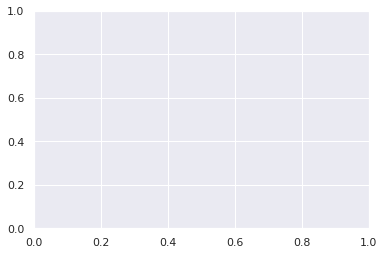